In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve)
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

print("Libraries imported Successfully !!")

Libraries imported Successfully !!


In [ ]:
from google.colab import files
print('Pls upload your csv file:')
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

Pls upload your csv file:


Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv


In [ ]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (30000, 25)


In [ ]:
print("\n"+"="*50)
print("EXPLORATORY DATA ANALYSIS")
print("\n"+"="*50)

print("\n1. Dataset Info:")
print(df.info())
print("\n2. First few rows:")
print(df.head())
print("\n3. Statistical Summary:")
print(df.describe())
print("\n4. Missing Values:")
print(df.isnull().sum())
print("\n5. Target Variable Distribution:")
if 'default payment next month' in df.columns:
  target_col = 'default payment next month'
elif 'default.payment.next.month' in df.columns:
  target_col = 'default.payment.next.month'
else:
  target_col = df.columns[-1]

print(df[target_col].value_counts())
print("\nClass Distribution (%):")
print(df[target_col].value_counts(normalize=True)*100)


EXPLORATORY DATA ANALYSIS


1. Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null

In [ ]:

print("\n" + "="*80)
print("DATA VISUALIZATION")
print("="*80)

# 4.1 Target Variable Distribution
plt.figure(figsize=(8, 5))
df[target_col].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Default vs Non-Default', fontsize=14, fontweight='bold')
plt.xlabel('Default Payment Next Month (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 4.2 Age Distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='AGE', bins=30, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x=target_col, y='AGE')
plt.title('Age vs Default')
plt.tight_layout()
plt.show()

# 4.3 Credit Limit Analysis
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='LIMIT_BAL', bins=50, kde=True)
plt.title('Credit Limit Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x=target_col, y='LIMIT_BAL')
plt.title('Credit Limit vs Default')
plt.tight_layout()
plt.show()

# 4.4 Gender and Education Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df.groupby(['SEX', target_col]).size().unstack().plot(kind='bar', ax=axes[0])
axes[0].set_title('Default by Gender (1=Male, 2=Female)')
axes[0].set_xlabel('Gender')
axes[0].legend(['No Default', 'Default'])

df.groupby(['EDUCATION', target_col]).size().unstack().plot(kind='bar', ax=axes[1])
axes[1].set_title('Default by Education Level')
axes[1].set_xlabel('Education')
axes[1].legend(['No Default', 'Default'])

plt.tight_layout()
plt.show()

# 4.5 Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation = df.corr()
sns.heatmap(correlation, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


DATA VISUALIZATION


NameError: name 'plt' is not defined

✓ Libraries imported successfully!
Please upload your CSV file:


Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv
✓ Dataset loaded successfully!
Dataset shape: (30000, 25)

EXPLORATORY DATA ANALYSIS

1. Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64

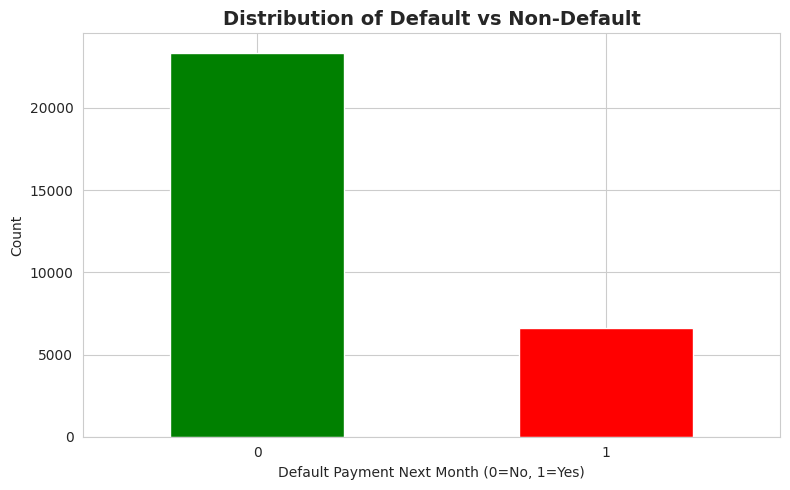

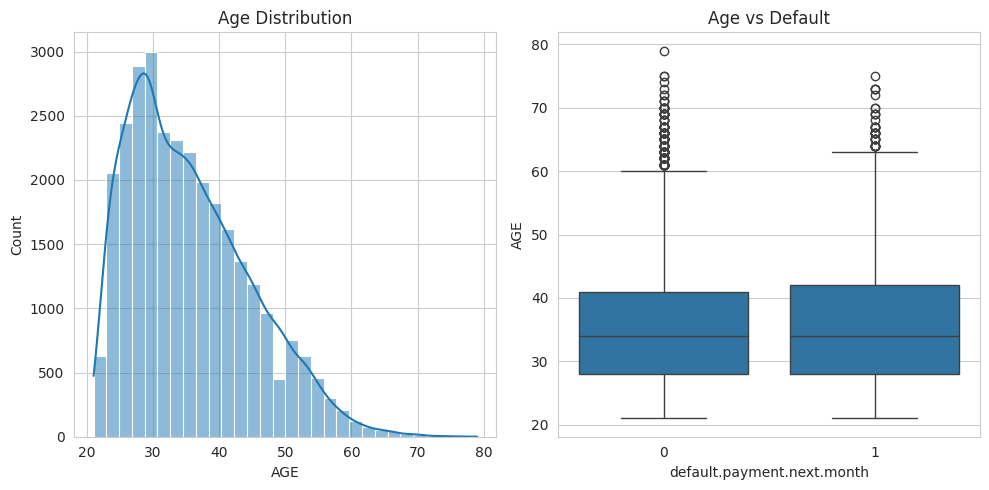

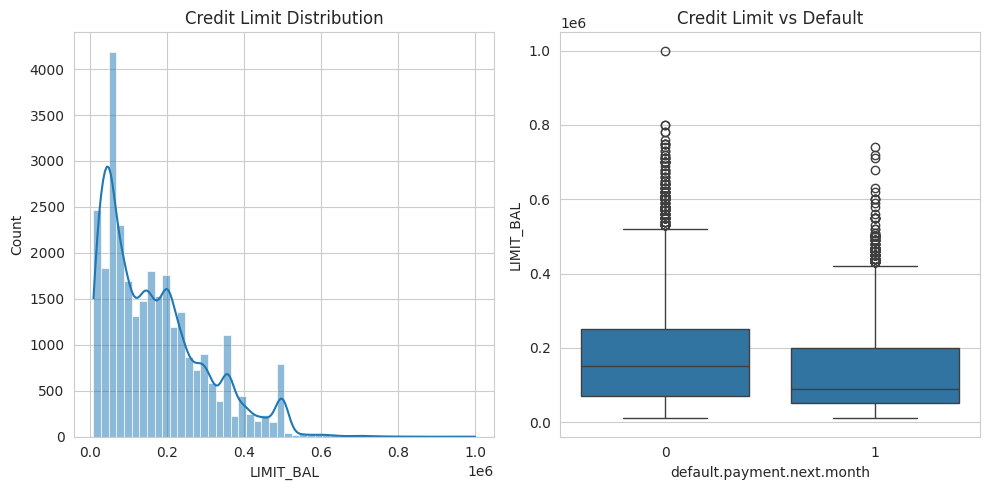

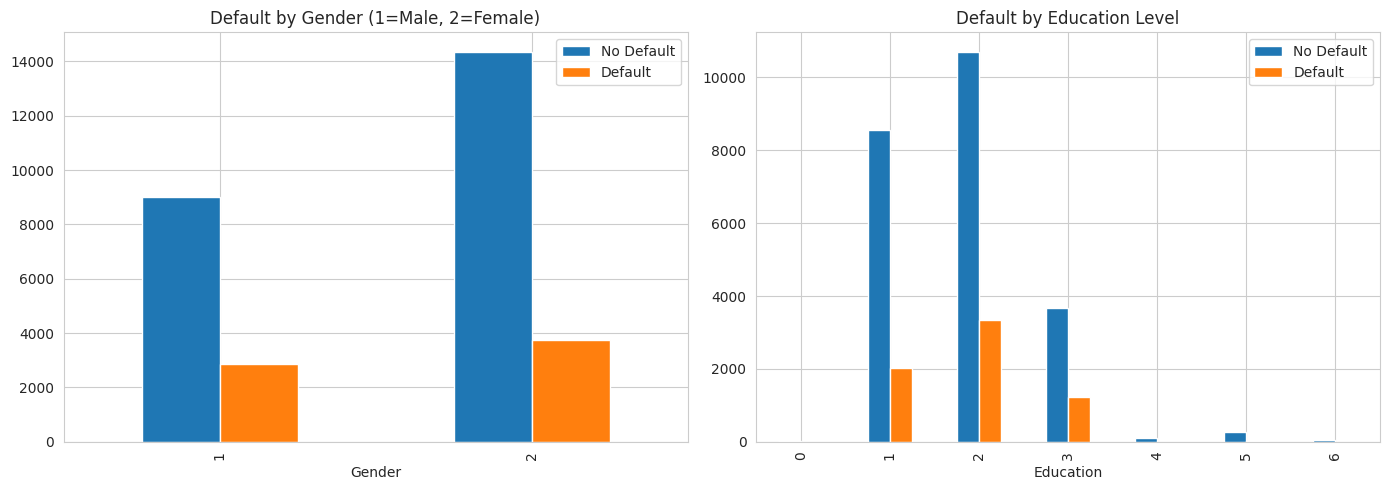

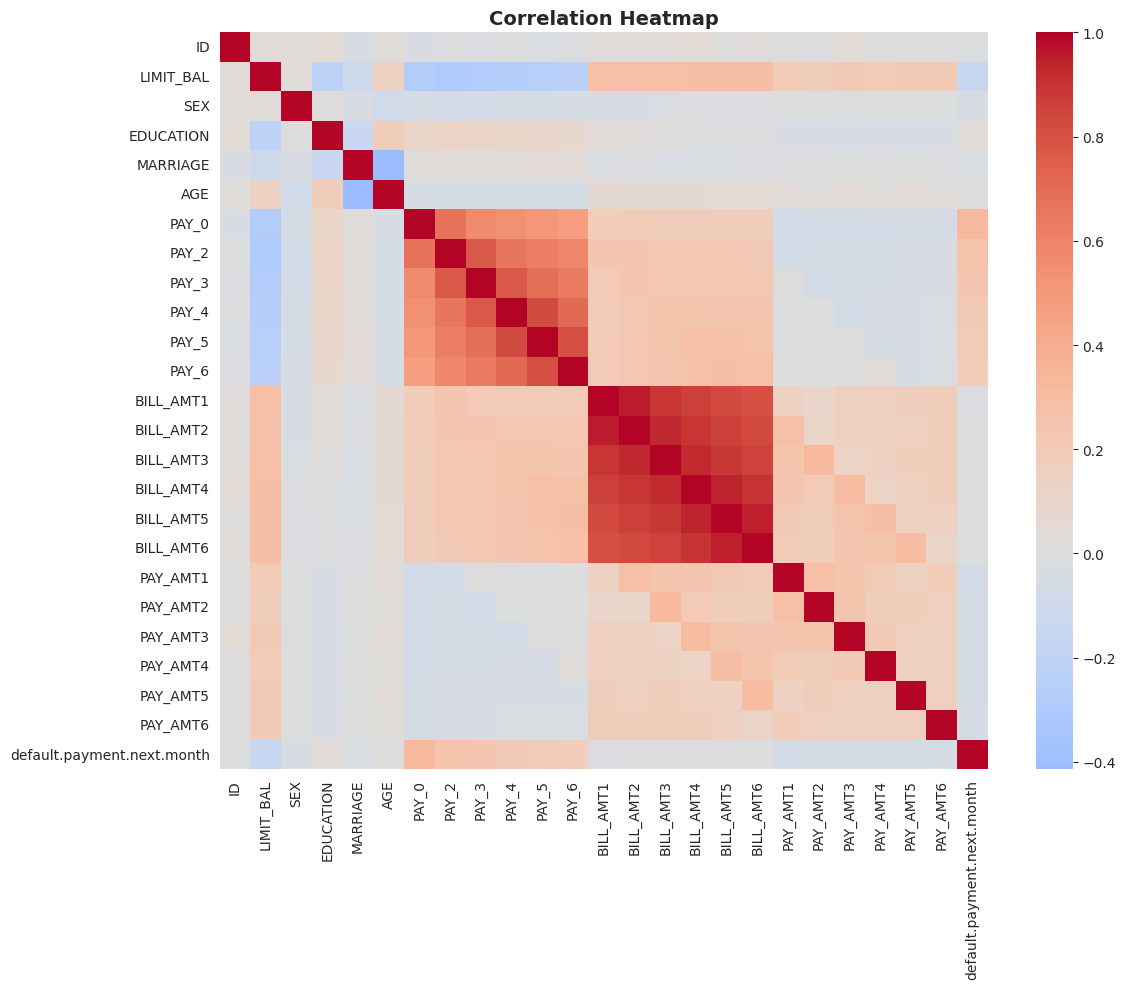


DATA PREPROCESSING

Features shape: (30000, 23)
Target shape: (30000,)

Training set size: (24000, 23)
Testing set size: (6000, 23)

✓ Data preprocessing completed!

MODEL BUILDING AND TRAINING

Training Logistic Regression...
✓ Logistic Regression completed!

Training Decision Tree...
✓ Decision Tree completed!

Training Random Forest...
✓ Random Forest completed!

Training Gradient Boosting...
✓ Gradient Boosting completed!

Training SVM...
✓ SVM completed!

✓ All models trained successfully!

MODEL EVALUATION RESULTS

               Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression  0.807667   0.686825 0.239638  0.355307 0.707636
      Decision Tree  0.715167   0.370421 0.411454  0.389861 0.607880
      Random Forest  0.811667   0.630810 0.357950  0.456731 0.750671
  Gradient Boosting  0.818333   0.663448 0.362472  0.468811 0.778423
                SVM  0.816000   0.665185 0.338357  0.448551 0.721039

🏆 Best Model: Gradient Boosting

DETAILED EVALUATION - G

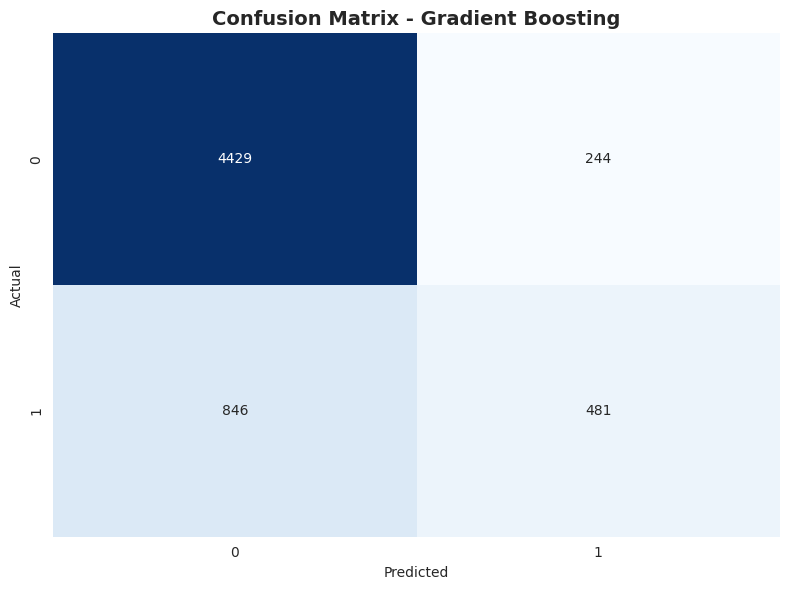


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.36      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



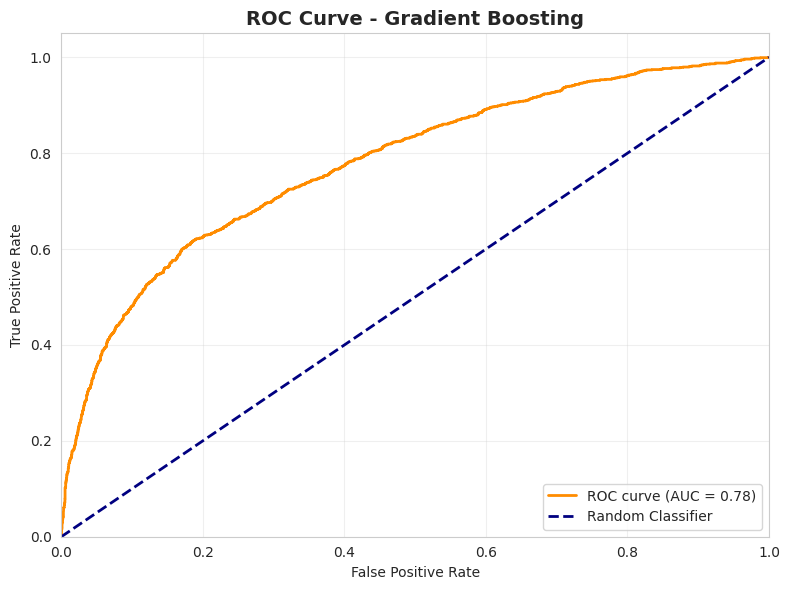


MODEL COMPARISON VISUALIZATION


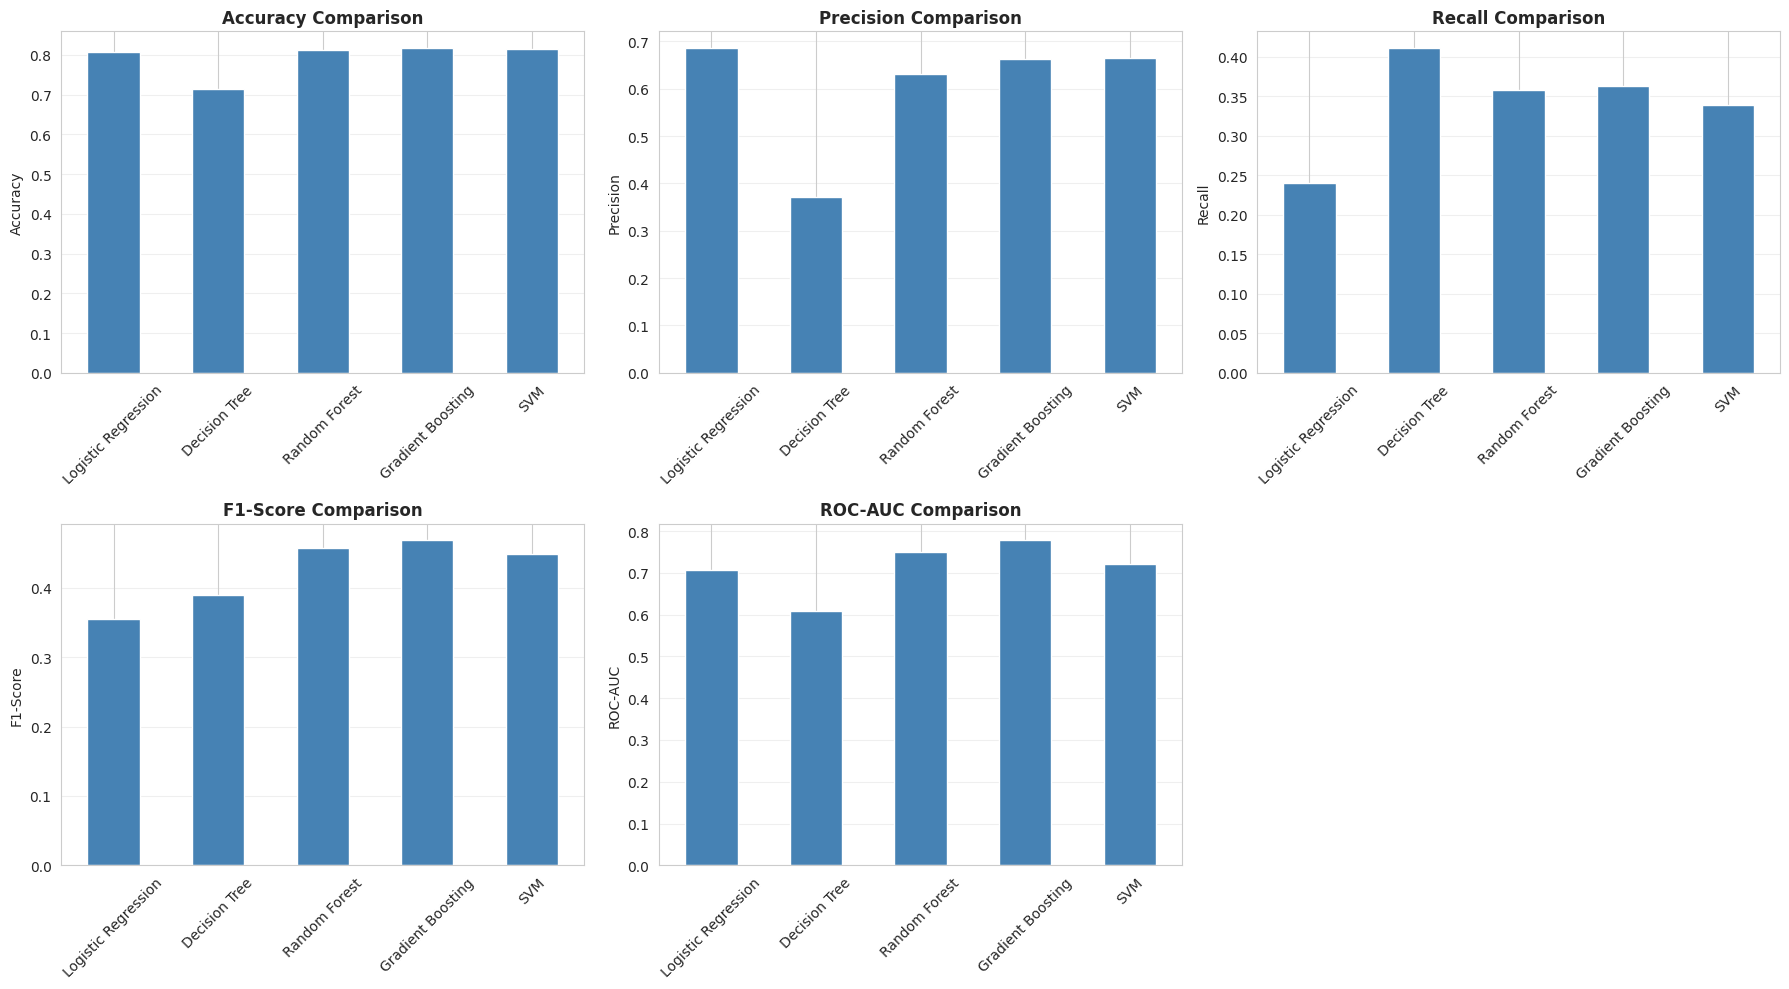


FEATURE IMPORTANCE ANALYSIS

Top 10 Important Features:
      Feature  Importance
5       PAY_0    0.634715
6       PAY_2    0.076458
11  BILL_AMT1    0.037117
7       PAY_3    0.034016
0   LIMIT_BAL    0.027764
19   PAY_AMT3    0.024142
18   PAY_AMT2    0.020707
9       PAY_5    0.019505
8       PAY_4    0.018523
17   PAY_AMT1    0.016955


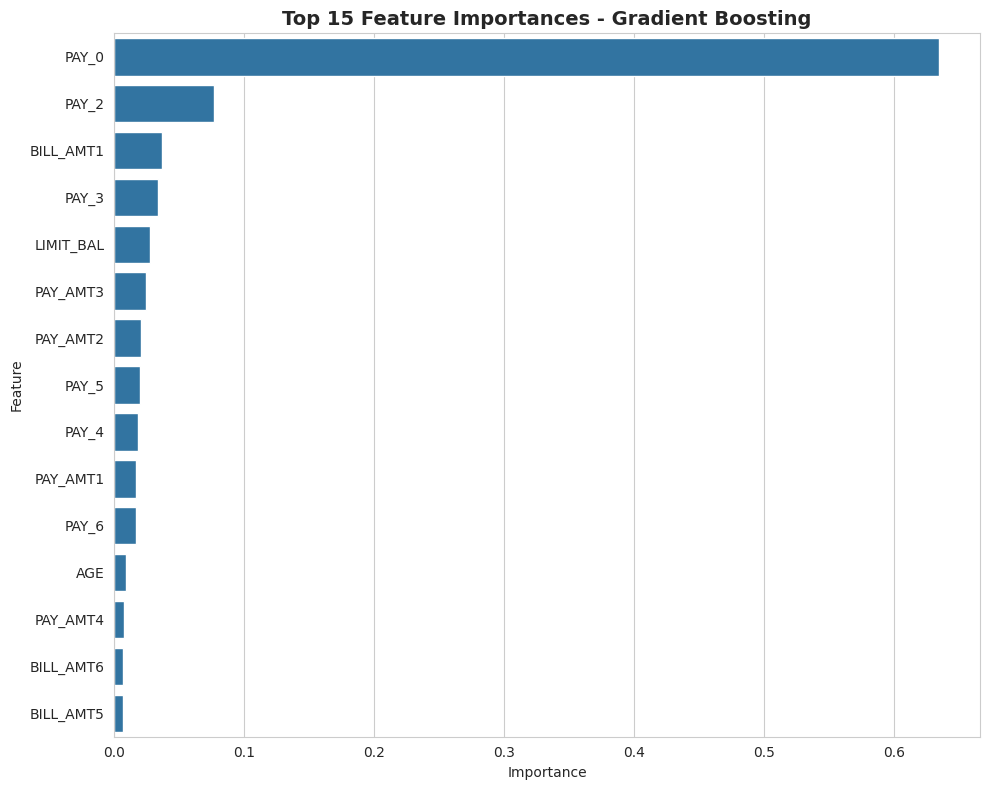


SAVING THE MODEL

✓ Model and scaler saved successfully!
  - best_credit_default_model.pkl
  - scaler.pkl

CREATING PREDICTION FUNCTION

✓ Prediction function created!

EXAMPLE PREDICTION

Sample Input:
              6907
LIMIT_BAL  50000.0
SEX            1.0
EDUCATION      2.0
MARRIAGE       2.0
AGE           46.0
PAY_0         -1.0
PAY_2         -1.0
PAY_3         -1.0
PAY_4         -1.0
PAY_5          0.0
PAY_6          0.0
BILL_AMT1   1540.0
BILL_AMT2  26060.0
BILL_AMT3      0.0
BILL_AMT4   2650.0
BILL_AMT5   3320.0
BILL_AMT6   2764.0
PAY_AMT1   26060.0
PAY_AMT2       0.0
PAY_AMT3    3472.0
PAY_AMT4    2320.0
PAY_AMT5    1764.0
PAY_AMT6    2841.0

Prediction: No Default
Probability of Default: 13.46%

PROJECT SUMMARY

✓ Dataset: 30000 records, 25 features
✓ Models Trained: 5
✓ Best Model: Gradient Boosting
✓ Best ROC-AUC Score: 0.7784
✓ Best Accuracy: 0.8183
✓ Best F1-Score: 0.4688

Project completed successfully! 🎉



In [ ]:
# Credit Card Default Prediction - Complete Analysis
# Mini Project Guide

# ============================================================================
# STEP 1: INSTALL AND IMPORT LIBRARIES
# ============================================================================

# Install additional libraries if needed
# !pip install imbalanced-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve)
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

print("✓ Libraries imported successfully!")

# ============================================================================
# STEP 2: LOAD THE DATASET
# ============================================================================

# Option 1: Upload manually to Colab
from google.colab import files
print("Please upload your CSV file:")
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Option 2: If you have the file in Google Drive
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv('/content/drive/MyDrive/your_file.csv')

# Option 3: Direct download from UCI (alternate source)
# url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
# df = pd.read_excel(url, header=1)

print("✓ Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")

# ============================================================================
# STEP 3: EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================

print("\n" + "="*80)
print("EXPLORATORY DATA ANALYSIS")
print("="*80)

# Basic information
print("\n1. Dataset Info:")
print(df.info())

print("\n2. First few rows:")
print(df.head())

print("\n3. Statistical Summary:")
print(df.describe())

print("\n4. Missing Values:")
print(df.isnull().sum())

# Check target variable distribution
print("\n5. Target Variable Distribution:")
if 'default payment next month' in df.columns:
    target_col = 'default payment next month'
elif 'default.payment.next.month' in df.columns:
    target_col = 'default.payment.next.month'
else:
    # Find the last column (usually the target)
    target_col = df.columns[-1]

print(df[target_col].value_counts())
print("\nClass Distribution (%):")
print(df[target_col].value_counts(normalize=True) * 100)

# ============================================================================
# STEP 4: DATA VISUALIZATION
# ============================================================================

print("\n" + "="*80)
print("DATA VISUALIZATION")
print("="*80)

# 4.1 Target Variable Distribution
plt.figure(figsize=(8, 5))
df[target_col].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Default vs Non-Default', fontsize=14, fontweight='bold')
plt.xlabel('Default Payment Next Month (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 4.2 Age Distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='AGE', bins=30, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x=target_col, y='AGE')
plt.title('Age vs Default')
plt.tight_layout()
plt.show()

# 4.3 Credit Limit Analysis
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='LIMIT_BAL', bins=50, kde=True)
plt.title('Credit Limit Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x=target_col, y='LIMIT_BAL')
plt.title('Credit Limit vs Default')
plt.tight_layout()
plt.show()

# 4.4 Gender and Education Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df.groupby(['SEX', target_col]).size().unstack().plot(kind='bar', ax=axes[0])
axes[0].set_title('Default by Gender (1=Male, 2=Female)')
axes[0].set_xlabel('Gender')
axes[0].legend(['No Default', 'Default'])

df.groupby(['EDUCATION', target_col]).size().unstack().plot(kind='bar', ax=axes[1])
axes[1].set_title('Default by Education Level')
axes[1].set_xlabel('Education')
axes[1].legend(['No Default', 'Default'])

plt.tight_layout()
plt.show()

# 4.5 Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation = df.corr()
sns.heatmap(correlation, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================================
# STEP 5: DATA PREPROCESSING
# ============================================================================

print("\n" + "="*80)
print("DATA PREPROCESSING")
print("="*80)

# Separate features and target
X = df.drop(columns=[target_col, 'ID'], errors='ignore')
y = df[target_col]

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Check for any remaining missing values
if X.isnull().sum().sum() > 0:
    print("\nHandling missing values...")
    X = X.fillna(X.median())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Data preprocessing completed!")

# ============================================================================
# STEP 6: MODEL BUILDING AND TRAINING
# ============================================================================

print("\n" + "="*80)
print("MODEL BUILDING AND TRAINING")
print("="*80)

# Dictionary to store models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    results[name] = {
        'Model': model,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Predictions': y_pred,
        'Probabilities': y_pred_proba
    }

    print(f"✓ {name} completed!")

print("\n✓ All models trained successfully!")

# ============================================================================
# STEP 7: MODEL EVALUATION AND COMPARISON
# ============================================================================

print("\n" + "="*80)
print("MODEL EVALUATION RESULTS")
print("="*80)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['Accuracy'] for m in results.keys()],
    'Precision': [results[m]['Precision'] for m in results.keys()],
    'Recall': [results[m]['Recall'] for m in results.keys()],
    'F1-Score': [results[m]['F1-Score'] for m in results.keys()],
    'ROC-AUC': [results[m]['ROC-AUC'] for m in results.keys()]
})

print("\n", comparison_df.to_string(index=False))

# Find best model
best_model_name = comparison_df.loc[comparison_df['ROC-AUC'].idxmax(), 'Model']
print(f"\n🏆 Best Model: {best_model_name}")

# ============================================================================
# STEP 8: DETAILED EVALUATION OF BEST MODEL
# ============================================================================

print("\n" + "="*80)
print(f"DETAILED EVALUATION - {best_model_name}")
print("="*80)

best_pred = results[best_model_name]['Predictions']
best_proba = results[best_model_name]['Probabilities']

# Confusion Matrix
cm = confusion_matrix(y_test, best_pred)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, best_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, best_proba)
roc_auc = roc_auc_score(y_test, best_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {best_model_name}', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================================
# STEP 9: MODEL COMPARISON VISUALIZATION
# ============================================================================

print("\n" + "="*80)
print("MODEL COMPARISON VISUALIZATION")
print("="*80)

# Bar plot comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, metric in enumerate(metrics):
    comparison_df.plot(x='Model', y=metric, kind='bar', ax=axes[idx], legend=False, color='steelblue')
    axes[idx].set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel(metric)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='y', alpha=0.3)

# Remove extra subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()

# ============================================================================
# STEP 10: FEATURE IMPORTANCE (for tree-based models)
# ============================================================================

if best_model_name in ['Random Forest', 'Gradient Boosting', 'Decision Tree']:
    print("\n" + "="*80)
    print("FEATURE IMPORTANCE ANALYSIS")
    print("="*80)

    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': results[best_model_name]['Model'].feature_importances_
    }).sort_values('Importance', ascending=False)

    print("\nTop 10 Important Features:")
    print(feature_importance.head(10))

    plt.figure(figsize=(10, 8))
    sns.barplot(data=feature_importance.head(15), x='Importance', y='Feature')
    plt.title(f'Top 15 Feature Importances - {best_model_name}', fontsize=14, fontweight='bold')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

# ============================================================================
# STEP 11: SAVE THE BEST MODEL (Optional)
# ============================================================================

print("\n" + "="*80)
print("SAVING THE MODEL")
print("="*80)

import pickle

# Save the model
with open('best_credit_default_model.pkl', 'wb') as f:
    pickle.dump(results[best_model_name]['Model'], f)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("\n✓ Model and scaler saved successfully!")
print("  - best_credit_default_model.pkl")
print("  - scaler.pkl")

# Download files (optional)
# from google.colab import files
# files.download('best_credit_default_model.pkl')
# files.download('scaler.pkl')

# ============================================================================
# STEP 12: PREDICTION FUNCTION
# ============================================================================

print("\n" + "="*80)
print("CREATING PREDICTION FUNCTION")
print("="*80)

def predict_default(input_data, model, scaler):
    """
    Predict credit card default for new data

    Parameters:
    input_data: array-like or dataframe with same features as training data
    model: trained model
    scaler: fitted scaler

    Returns:
    prediction: 0 (No Default) or 1 (Default)
    probability: probability of default
    """
    # Scale the input
    input_scaled = scaler.transform(input_data)

    # Predict
    prediction = model.predict(input_scaled)
    probability = model.predict_proba(input_scaled)[:, 1]

    return prediction, probability

print("\n✓ Prediction function created!")

# Example prediction
print("\n" + "="*80)
print("EXAMPLE PREDICTION")
print("="*80)

sample = X_test.iloc[0:1]
prediction, probability = predict_default(
    sample,
    results[best_model_name]['Model'],
    scaler
)

print(f"\nSample Input:\n{sample.T}")
print(f"\nPrediction: {'Default' if prediction[0] == 1 else 'No Default'}")
print(f"Probability of Default: {probability[0]:.2%}")

# ============================================================================
# FINAL SUMMARY
# ============================================================================

print("\n" + "="*80)
print("PROJECT SUMMARY")
print("="*80)

print(f"""
✓ Dataset: {df.shape[0]} records, {df.shape[1]} features
✓ Models Trained: {len(models)}
✓ Best Model: {best_model_name}
✓ Best ROC-AUC Score: {results[best_model_name]['ROC-AUC']:.4f}
✓ Best Accuracy: {results[best_model_name]['Accuracy']:.4f}
✓ Best F1-Score: {results[best_model_name]['F1-Score']:.4f}

Project completed successfully! 🎉
""")

print("="*80)